In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

    과제 
    A B 그룹의 Box Plot을 그리고 이상치를 구하세요

- data load

<AxesSubplot:xlabel='species', ylabel='length'>

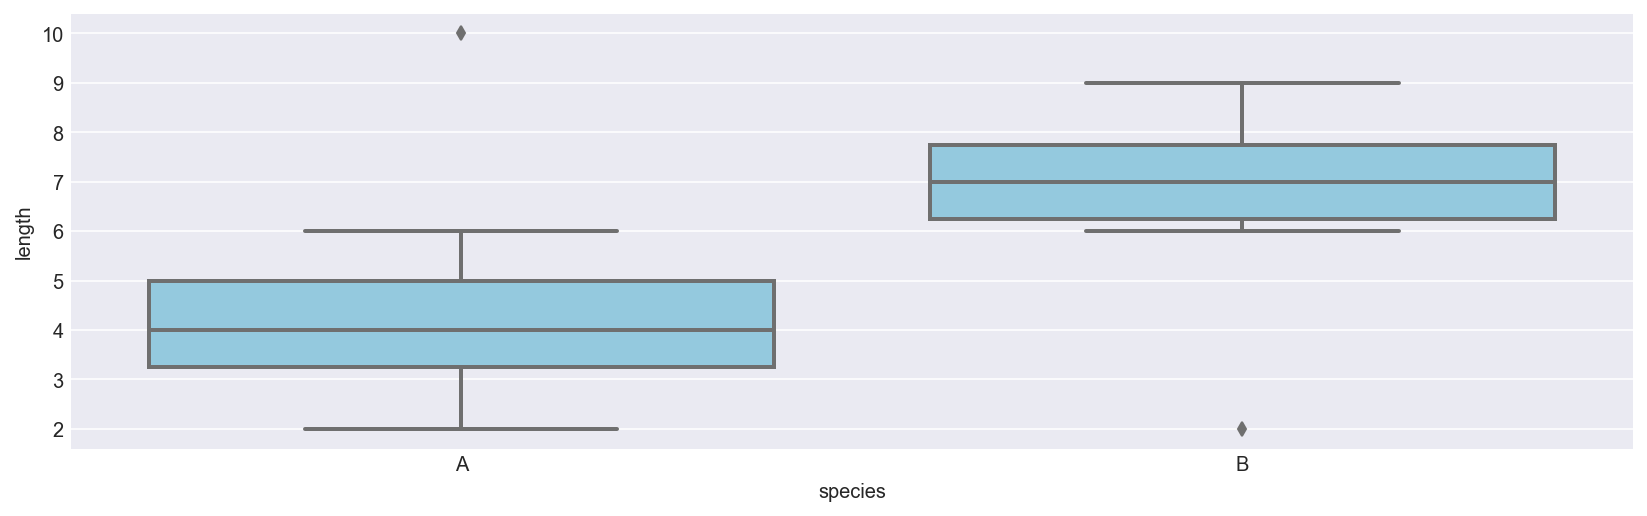

In [2]:
fish_multi = pd.read_csv('../Data/4_fm2.csv')
fish_multi.iloc[5,1] = 10
# #test
# fish_multi.iloc[3,1] = 30
fish_multi.iloc[10,1] = 2
fish_multi.groupby('species').describe()
sns.boxplot(x='species',y='length',data=fish_multi,color='skyblue')

In [3]:
#풀어쓰기
test1 = fish_multi.groupby('species')
A =test1.get_group('A')
B =test1.get_group('B')

a_Q1 = A.length.describe()['25%']
a_Q3 = A.length.describe()['75%']
b_Q1 = B.length.describe()['25%']
b_Q3 = B.length.describe()['75%']

a_IQR = a_Q3 - a_Q1
b_IQR = b_Q3 - b_Q1

A_ol=A[(A['length']<(a_Q1 - 1.5*a_IQR)) | (A['length'] > (a_Q3 + 1.5*a_IQR))]
B_ol=B[(B['length']<(b_Q1 - 1.5*b_IQR)) | (B['length'] > (b_Q3 + 1.5*b_IQR))]

Fish_outlier = A_ol.merge(B_ol,how='outer')
Fish_outlier

,species,length
0,A,10
1,B,2


In [4]:
#사용자 함수 생성 by 아름님
def find_outlier(x):
    Q1,Q3 = np.percentile(x,[25,75])
    IQR = Q3 - Q1
    outlier = x.loc[(x < (Q1 - 1.5*IQR)) | (x > (Q3 + 1.5 * IQR))].tolist()
    return outlier

fish_multi.groupby('species').agg(find_outlier)

,length
species,
A,[10]
B,[2]


    과제 - 추가 decoration / 막대그래프


range(0, 10)
[4 2 7 9 8 4 7 2 8 5]


Text(0.5, 0, 'x')

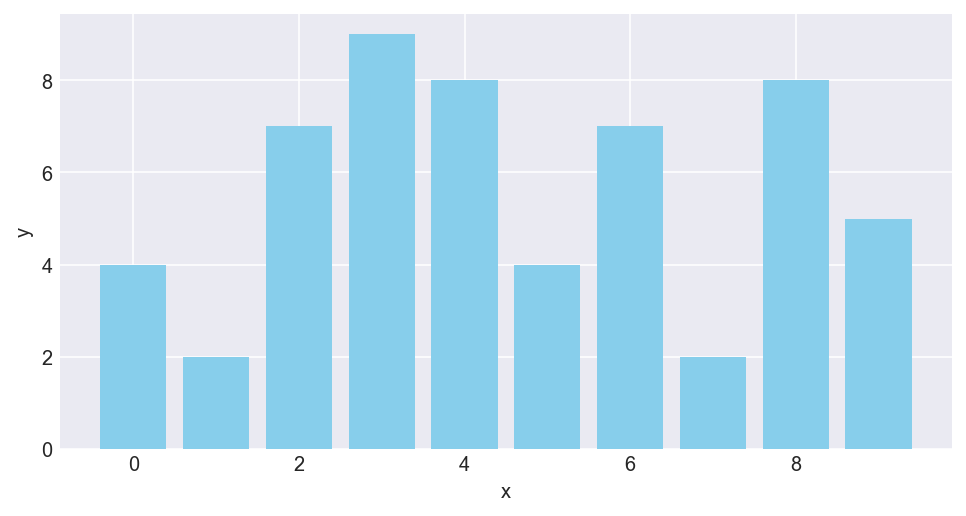

In [5]:
# 문제 값
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8,color='skyblue')
plt.ylabel('y')
plt.xlabel('x')


No handles with labels found to put in legend.


range(0, 10)
[2 5 7 2 5 8 9 5 8 7]


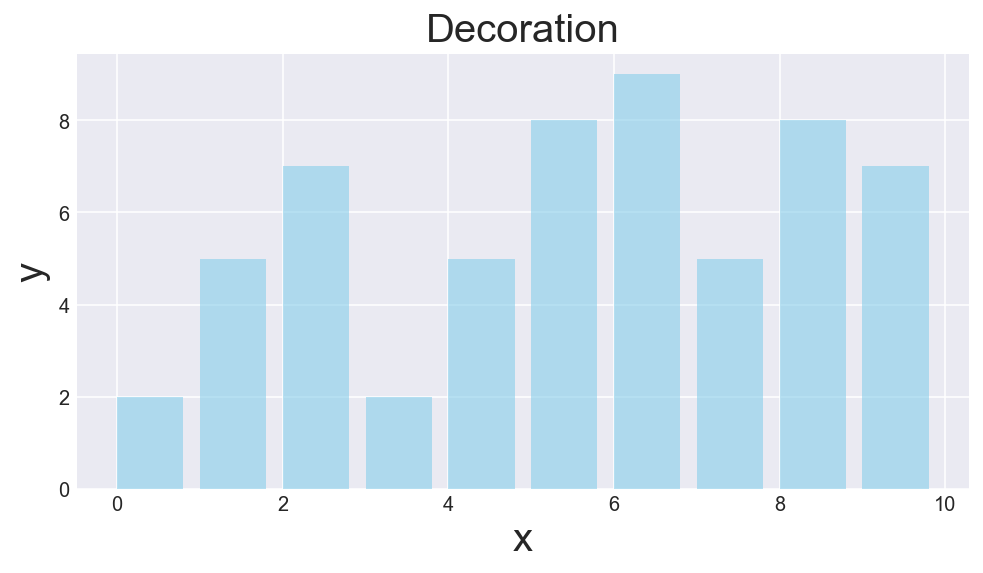

In [6]:
# 결과값
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(8,4))
# 1. 폰트 크기 변경
plt.ylabel('y',fontsize=20) 
plt.xlabel('x',fontsize=20)
# 2. Title생성
plt.title('Decoration',fontsize=20)
plt.bar(x,y,width=0.8,align='edge',color='skyblue',alpha=0.6) #한쪽 끝으로 정렬
plt.legend()
# 3. font
# plt.xticks(index,label,fontsize=15)

    과제
    Q. hist, line, bar, scatter 그래프 4개를 서브플록으로 출력하세요

In [7]:
data =pd.read_excel('../Data/2020국민여행조사.xlsx')

In [8]:
data

,ID,SA1_1,SA1_2,SA1_3,SA1_4,SA1_5,SA1_6,D_TRA1_CHECK,D_TRA1_CASE,D_TRA1_SYEAR,...,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10
0,11010530201_1,0,0,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11010530201_10,0,0,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11010530201_17,0,1,0,0,0,0,Y,2.0,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11010530201_2,0,0,1,0,0,0,NaN,3.0,2020.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11010530201_22,0,0,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50705,39020620231_345550,0,0,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50706,39020620231_345551,0,0,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50707,39020620231_345582,0,0,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50708,39020620231_345590,0,0,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
